# Ejercicio 3

Crear un programa utilizando la librería Pandas y Matplotlib que realice lo siguiente:

1. Crear el siguiente DataFrame indexado:
  ```sh
    Calorias  Tiempo
  L      420      60
  M      380      40
  X      390      75
  J      490      55
  V      300      45
  ```
2. Calcular la media, mediana y desviación típica de ambas columnas.
3. Añadir otra columna booleana al DataFrame para ver si se ha cumplido el reto de quemar más de 400 calorías por hora. La nueva columna debe generarse aplicando una fórmula a las otras columnas. El DataFrame resultante debe ser el siguiente:
  ```sh
    Calorias  Tiempo   Reto
  L      420      60   True
  M      380      40   True
  X      390      75  False
  J      490      55   True
  V      300      45  False
  ```
4. Filtrar el DataFrame y devolver otro DataFrame con las filas pares que cumplan que el número de calorías es mayor de 400.
5. Crear a partir del DataFrame una serie con los porcentajes de días que se ha conseguido el reto y los que no.
6. Crear un gráfico como el de más abajo que muestre la progresión de las calorías y tiempo durante la semana.

![Serie evolución calorias](../../img/evolucion-calorias.png)

# Solución

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Creamos un diccionario con claves los nombres de las columnas y valores las listas con los elementos de las columnas.
datos = {
  "Calorias": [420, 380, 390, 490, 300],
  "Tiempo": [60, 40, 75, 55, 45]
}
# Creamos una lista con los días de la semana para utilizarla como índice
semana = ["L", "M", "X", "J", "V"]
# Creamos el DataFrame
df = pd.DataFrame(datos, semana)
print(df)



   Calorias  Tiempo
L       420      60
M       380      40
X       390      75
J       490      55
V       300      45


In [22]:
# Calculamos la media.
print('Medias:')
print(df.mean())
# Calculamos la mediana.
print('Medianas:')
print(df.median())
# Calculamos la desviación típica.
print('Desviaciones típicas:')
print(df.std())

Medias:
Calorias    396.0
Tiempo       55.0
dtype: float64
Medianas:
Calorias    390.0
Tiempo       55.0
dtype: float64
Desviaciones típicas:
Calorias    68.774995
Tiempo      13.693064
dtype: float64


In [27]:
# Añadimos una nueva columna comparando las calorisas consumidas por hora con 400 calorias por 60 minutos.
df["eto"] = df.Calorias / df.Tiempo > 400 / 60
print(df)


   Calorias  Tiempo   reto   Reto
L       420      60   True   True
M       380      40   True   True
X       390      75  False  False
J       490      55   True   True
V       300      45  False  False


In [24]:
# Obtenemos la filas pares.
df_filtrado = df.iloc[range(0, df.shape[0], 2)]
# Obtenemos las filas con un número de calorías mayor de 400.
df_filtrado = df_filtrado[df_filtrado.Calorias > 400]
print(df_filtrado)

   Calorias  Tiempo  reto
L       420      60  True


In [28]:
# Calculamos los porcentajes de días en los que se ha cumplido el reto y los que no.
print(df.Reto.value_counts(normalize = True) * 100)

True     60.0
False    40.0
Name: Reto, dtype: float64


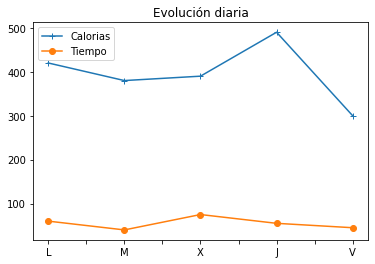

In [36]:
fig, ax = plt.subplots()
df.plot(y = 'Calorias', marker = "+", ax = ax)
df.plot(y = 'Tiempo', marker = "o", ax = ax)
plt.title('Evolución diaria')
plt.show()